# Support Vector Machine Classifier
The basis on which [Support Vector Machines](https://en.wikipedia.org/wiki/Support_vector_machine) (SVMs) work is the principle that it is always possible to transform any set of data so that the classes within it can be separated linearly. This is a powerful idea, and the technique used to transform data into linearly separable space is actually referred to as the **Kernel *trick*.**

In this post we will see some basic math for SVM classifiers, learn about the kernel trick, and implement a two class SVM algorithm in Python. Clearly there is a lot of ground to cover, so lets get started!

## Which is the best line?

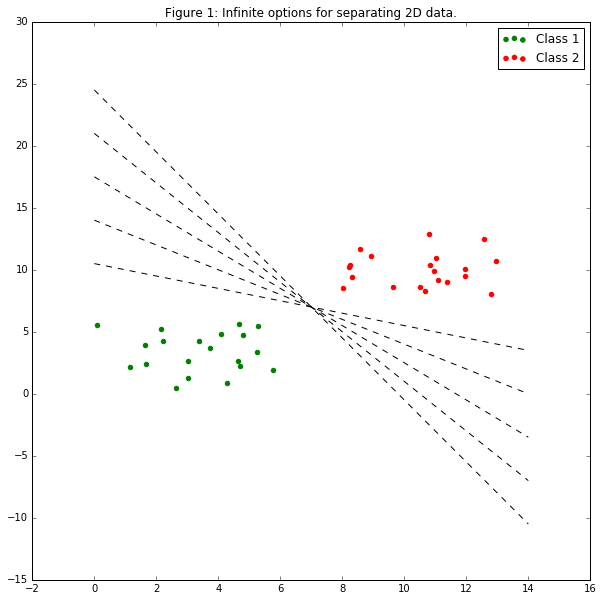

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
np.random.seed(1234)
x1 = np.random.uniform(0, 6, 20)
y1 = np.random.uniform(0, 6, 20)
x2 = np.random.uniform(8, 13, 20)
y2 = np.random.uniform(8, 13, 20)
plt.scatter(x1, y1, label = 'Class 1', color = 'g');
plt.scatter(x2, y2, label = 'Class 2', color = 'r');
x = np.linspace(0, 14, 20)
coeffs = [(b, 7 - b*7) for b in np.arange(-2.5, 0, 0.5)]
for (b, c) in coeffs:
    plt.plot(x, b*x + c, linestyle = '--', color = 'k');
plt.title('Figure 1: Infinite options for separating 2D data.')
plt.legend();
plt.savefig('Figure1.png')

Looking at the figure above, we can see that even in the simplest scenario of 2-class linearly separable data, there are an infinite number of possible decision boundaries (or separating hyperplanes) that can be drawn. So regardless of the dimension of our data, the key question is: how do we know which one is the "best" one given unseen data?

The SVM approach to deciding the best separating hyperplane given any data is to generate what is called a **maximum marginal hyperplane**.

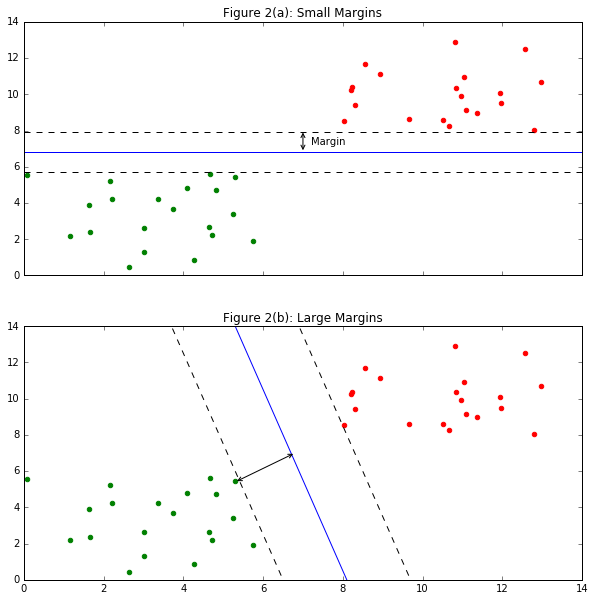

In [20]:
f, (ax1, ax2) = plt.subplots(2, sharex = True, sharey = True, figsize = (10,10))
ax1.axis([0, 14, 0, 14])
ax1.scatter(x1, y1, label = 'Class 1', color = 'g');
ax1.scatter(x2, y2, label = 'Class 2', color = 'r');
ax1.axhline(y = (7.9+5.7)/2);
for x in [5.7, 7.9]:
    ax1.axhline(y = x, linestyle = '--', color = 'k');
ax1.annotate('', xy = (7, (7.9+5.7)/2), xycoords = 'data', xytext = (7,8), textcoords = 'data',arrowprops={'arrowstyle': '<->'})
ax1.annotate(s = 'Margin', xy = (7.2,7.2), xycoords = 'data')
ax1.set_title('Figure 2(a): Small Margins')

ax2.scatter(x1, y1, label = 'Class 1', color = 'g');
ax2.scatter(x2, y2, label = 'Class 2', color = 'r');
x = np.linspace(0, 14, 20)
ax2.plot(x, (-5*x + 48.5 + -5*x + 32.5)/2);
ax2.plot(x, -5*x + 48.5, linestyle = '--', color = 'k')
ax2.plot(x, -5*x + 32.5, linestyle = '--', color = 'k')
ax2.annotate('', xy = (5.3, 5.4), xycoords = 'data', xytext = (6.8,7), textcoords = 'data',arrowprops={'arrowstyle': '<->'})
ax2.set_title('Figure 2(b): Large Margins')
f.savefig('Figure2.png')

Margins are defined as the smallest perpendicular distance between the separating hyperplane and any of the data points as illustrated in Figure 2. Here we see two possible separating hyperplanes, with (a) having smaller margins than (b). The general rule that SVM follows is that a hyperplane with larger margins, such as the one in (b), provides for greater generalisation accuracy.

Intuitively the idea is that as more data points are added, the hyperpane with the larger margin will be more accurate at classifying future data than the hyperpane with the smaller margin. That is, it is more likely that the hyperplane in (b) will separate unseen data with higher accuracy than the hyperplane in (a).

This is why the SVM looks for the maximum marginal hyperplane, that is, the hyperplane with the largest margin.

## Linear Hyperplane
Lets start with developing the math for the simple two class problem in which the classes are linearly separable.

Let the data be a set of N training feature vectors $\{\mathbf{x}_i\}$ for $i = 1, ..., N$, that are each assigned to one of two classes, $\omega_1$ and $\omega_2$, with labels $t_i = \pm 1$. Here the separating hyperplane can be defined as:
$$y(\mathbf{x}) = \mathbf{w}^{T}\mathbf{x}+b$$.

Here the $\mathbf{w} = {w_1, w_2, ..., w_N}$ is the weight vector and $b$ is the bias.

The classification rule is defined as follows: $y(\mathbf{x}_i) > 0$ for points having $t_i = + 1$ and $y(\mathbf{x}_i) < 0$ for points having $t_i = - 1$ for all of the training points. 

Based on this rule, and assuming a linearly separable feature space, there exists at least one choice of the parameters $\mathbf{w}$ and $b$ so that $t_{i}y(\mathbf{x}_i) > 0$ for all the training feature points. Thus the separating hyperplane is specified by $$\mathbf{w}^{T}\mathbf{x}+b = 0$$.

### Margins
For a given $M > 0$, we can also define that any point $\mathbf{x}_i$ either $y(\mathbf{x}_i) \geq M$ such that $t_i = + 1$ or $y(\mathbf{x}_i) \leq -M$ such that $t_i = - 1$. Thus we can write the following:

$\mathbf{w}^{T}\mathbf{x}+b \geq M$ for $y_i = +1$

$\mathbf{w}^{T}\mathbf{x}+b \leq -M$ for $y_i = -1$

or equivalently

$t_i(\mathbf{w}^{T}\mathbf{x}_i+b) \geq M$

The distance of any point $\mathbf{x}_i$ from the separating hyperplane is $\frac{|y(x)|}{||\mathbf{w}||}$. Here $||\mathbf{w}||$ is the Euclidean norm of $\mathbf{w}$ i.e. $\sqrt{\mathbf{w}^T\mathbf{w}}$. As we want all points to be correctly classified, we know that $t_{i}y(\mathbf{x_i}) > M > 0$ for all $i$. So the distance of a point $\mathbf{x_i}$ to the separating hyperplane is given by:

$$\frac{t_{i}y(\mathbf{x_i})}{||\mathbf{w}||} = \frac{t_{i}(\mathbf{w}^{T}\mathbf{x}_i+b)}{||\mathbf{w}||} \geq \frac{M}{||\mathbf{w}||}$$

From the equation above it is also clear that all points are at least $\frac{M}{||\mathbf{w}||}$ in perpendicular distance to the separating hyperplane. Thus the maximal margin possible is $\frac{2M}{||\mathbf{w}||}$.

We can take M = 1 (i.e. rescale $\mathbf{w}$ and $b$ by dividing by M) without impacting the distance measure to define the *canonical hyperplanes* as below: 

$H_1: \mathbf{w}^{T}\mathbf{x}+b \geq 1$ for $y_i = +1$

$H_2: \mathbf{w}^{T}\mathbf{x}+b \leq -1$ for $y_i = -1$

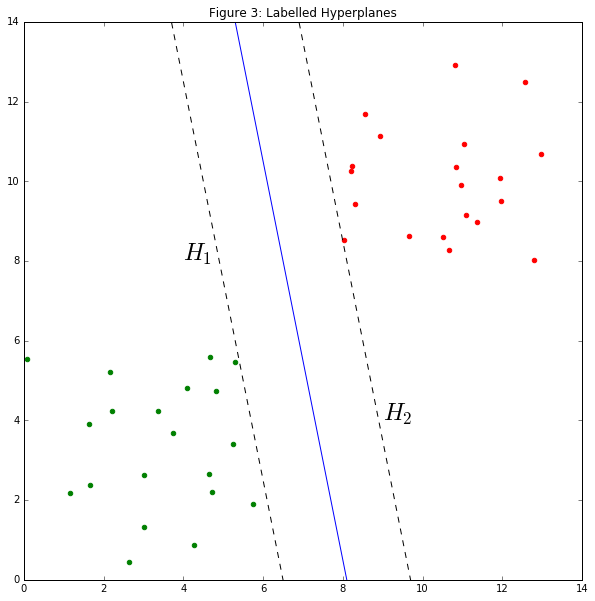

In [37]:
plt.figure(figsize = (10,10))
plt.axis([0, 14, 0, 14])
plt.scatter(x1, y1, label = 'Class 1', color = 'g');
plt.scatter(x2, y2, label = 'Class 2', color = 'r');
x = np.linspace(0, 14, 20)
plt.plot(x, (-5*x + 48.5 + -5*x + 32.5)/2);
plt.plot(x, -5*x + 48.5, linestyle = '--', color = 'k')
plt.plot(x, -5*x + 32.5, linestyle = '--', color = 'k')
plt.annotate(r'$H_1$', xy = (4, 8), xycoords = 'data', fontsize = 24)
plt.annotate(r'$H_2$', xy = (9, 4), xycoords = 'data', fontsize = 24)
plt.title('Figure 3: Labelled Hyperplanes')
plt.savefig('Figure3.png')

## Limitations of SVM
1. SVMs do not scale well, in terms of computation complexity, to large datasets.